### **Context**
A tip is considered as a monetary incentive that is given by the customers or guests for polite, prompt, and efficient service provided by the staff. The practice of giving tips has been continuing for a very long time and has become particularly popular in service industries such as hotels and restaurants.

### **Objective**
Chef's Kitchen is one of the most popular restaurants in the city of San Diego and acts as a one-stop destination for food lovers. The polite and efficient service provided by the restaurant staff often gets them tips from the customer. As a Data Analyst for the restaurant, task is  analyze the data provided to identify the patterns and trends in the revenue and tips received from customers across different demographies and come up with informative visualizations to  convey the insights obtained from the analysis. <br>
<br>
The dataset consists of the following features:

- **order_id**: unique identifier of each order
- **day**: day of the week on which the customer visited the restaurant (Thur/Fri/Sat/Sun)
- **time**: time of the day at which the customer visited the restaurant (Lunch or Dinner)
- **size**: number of people present at the table
- **smoker**: whether the table included smokers (No: The table did not include smokers, Yes: The table included smokers)
- **sex**: gender of the payer of the bill (Male or Female)
- **total_bill**: the bill amount in dollars
- **tip**: the tip amount in dollars


### **Importing the libraries**

In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading the dataset**

In [2]:
# loading the dataset
tips = pd.read_csv("tips.csv")

#### **Data Overview**

In [3]:
# checking the top 5 rows of the dataset
tips.head()

,order_id,day,time,size,smoker,sex,total_bill,tip
0,1,Sun,Dinner,2,No,Female,16.99,1.01
1,2,Sun,Dinner,3,No,Male,10.34,1.66
2,3,Sun,Dinner,3,No,Male,21.01,3.50
3,4,Sun,Dinner,2,No,Male,23.68,3.31
4,5,Sun,Dinner,4,No,Female,24.59,3.61


In [5]:
# checking the last 5 rows of the dataset
tips.head()

,order_id,day,time,size,smoker,sex,total_bill,tip
0,1,Sun,Dinner,2,No,Female,16.99,1.01
1,2,Sun,Dinner,3,No,Male,10.34,1.66
2,3,Sun,Dinner,3,No,Male,21.01,3.50
3,4,Sun,Dinner,2,No,Male,23.68,3.31
4,5,Sun,Dinner,4,No,Female,24.59,3.61


In [6]:
# checking the 5 random rows
tips.sample(5)

,order_id,day,time,size,smoker,sex,total_bill,tip
56,57,Sat,Dinner,4,Yes,Male,38.01,3.00
213,214,Sat,Dinner,2,Yes,Female,13.27,2.50
45,46,Sun,Dinner,2,No,Male,18.29,3.00
177,178,Sun,Dinner,2,Yes,Male,14.48,2.00
179,180,Sun,Dinner,2,Yes,Male,34.63,3.55


- The dataset contains information about the customers who are visiting the restaurant
- It contains details about the day and time at which the customer has visited the restaurant and gives information about their billing and tip amount.

In [7]:
# checking the shape of the dataset
tips.shape

(244, 8)

- There are 244 rows and 8 columns in the dataset.*

#### **Checking the data types of the columns for the dataset**

In [8]:
# checking the basic info the dataset
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    244 non-null    int64  
 1   day         244 non-null    object 
 2   time        244 non-null    object 
 3   size        244 non-null    int64  
 4   smoker      244 non-null    object 
 5   sex         244 non-null    object 
 6   total_bill  244 non-null    float64
 7   tip         244 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


- The total_bill, tip, size and order_id columns are numerical columns while the rest are categorical in nature.

Let us drop the `order_id` column from our dataset as it will not add any value to our analysis since it is an  unique identifier.

In [9]:
# droping the order_id column from our dataset as it will not add any value to our analysis since it is an unique identifier.
tips.drop('order_id', axis=1, inplace=True)

In [10]:
# checking the dataframe again
tips.head()

,day,time,size,smoker,sex,total_bill,tip
0,Sun,Dinner,2,No,Female,16.99,1.01
1,Sun,Dinner,3,No,Male,10.34,1.66
2,Sun,Dinner,3,No,Male,21.01,3.50
3,Sun,Dinner,2,No,Male,23.68,3.31
4,Sun,Dinner,4,No,Female,24.59,3.61


In [11]:
# checking basic statistical summary of the dataset
tips.describe()

,size,total_bill,tip
count,244.000000,244.000000,244.000000
mean,2.569672,19.785943,2.998279
std,0.951100,8.902412,1.383638
min,1.000000,3.070000,1.000000
25%,2.000000,13.347500,2.000000
50%,2.000000,17.795000,2.900000
75%,3.000000,24.127500,3.562500
max,6.000000,50.810000,10.000000


- The bill amount ranges from around 3 dollars to 50 dollars while the average bill amount is around 20 dollars. Half of the bill amounts are less than 18 dollars which indicate that most of the orders are not very costly.
- The tip amount ranges from around 1 dollar to 10 dollars. The mean and median of the tip amounts are very close to each other.
- The group size varies from 1 person to 6 people.

#### **Exploratory Data Analysis**

###### Understanding the distribution of total_bill

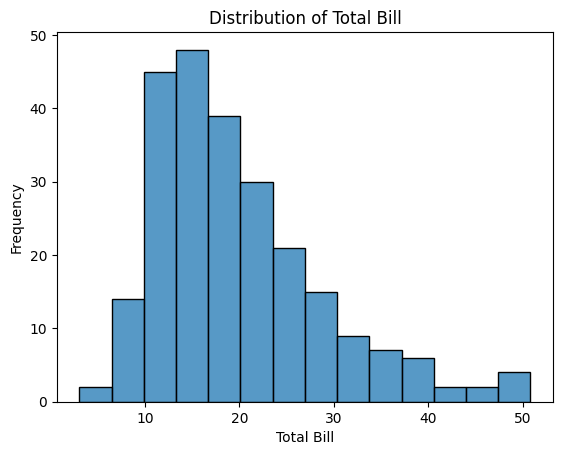

In [13]:
# plotting histogram of total_bill
sns.histplot(data=tips, x='total_bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.title('Distribution of Total Bill')
plt.show()

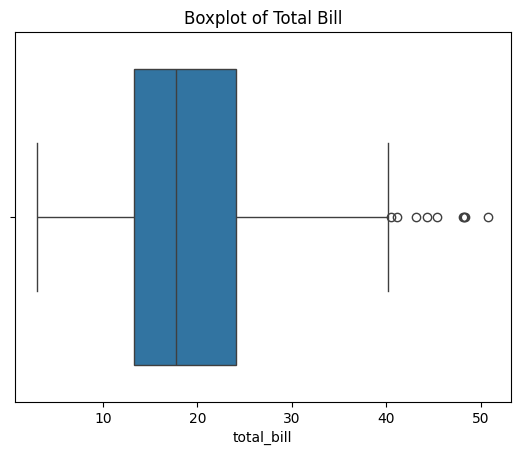

In [20]:
# plotting boxplot
sns.boxplot(data=tips, x="total_bill")
plt.title('Boxplot of Total Bill')
plt.show()

- The **total_bill** column is slightly right-skewed.
- Almost half of the customers pay less than 18 dollars for overall bill.
- 50% of the billing amounts lie between 12 to 25 dollars.


###### Understanding the distribution of tip

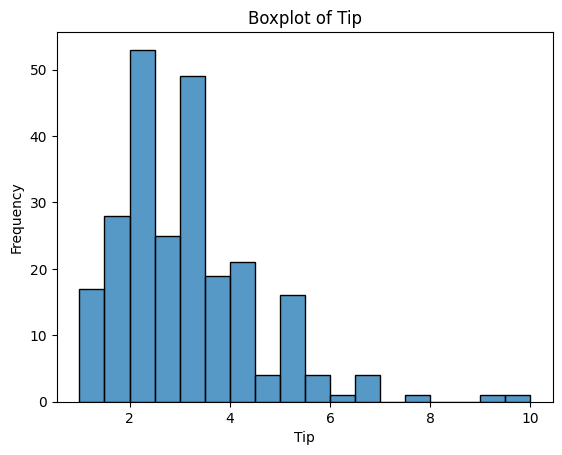

In [19]:
# plotting histogram
sns.histplot(data=tips, x='tip')
plt.title('Boxplot of Tip')
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.show()

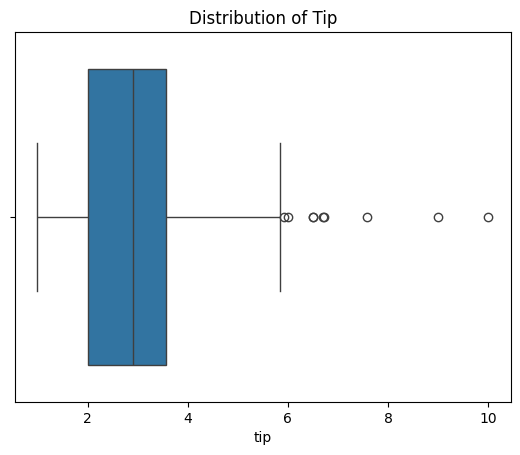

In [16]:
# plotting boxplot
sns.boxplot(data=tips, x="tip")
plt.title('Boxplot of Tip')
plt.show()

- The tip column is also slightly right-skewed.
- 50% of the people pay less than 3 dollars as tip.
- Half of the tip amounts lie between 2 to 4 dollars.

##### Understanding the distribution of size

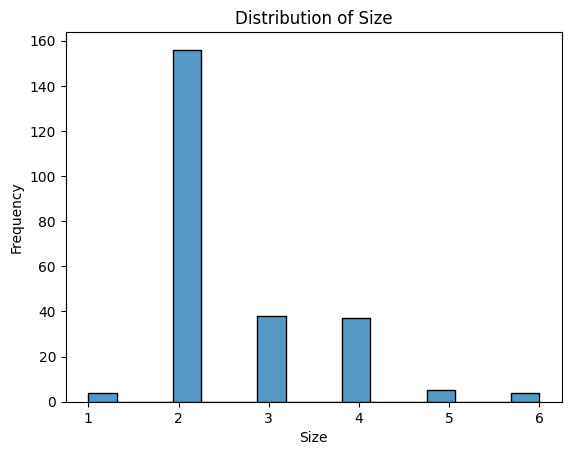

In [17]:
# plotting histogram
sns.histplot(data=tips, x='size')
plt.title('Distribution of Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

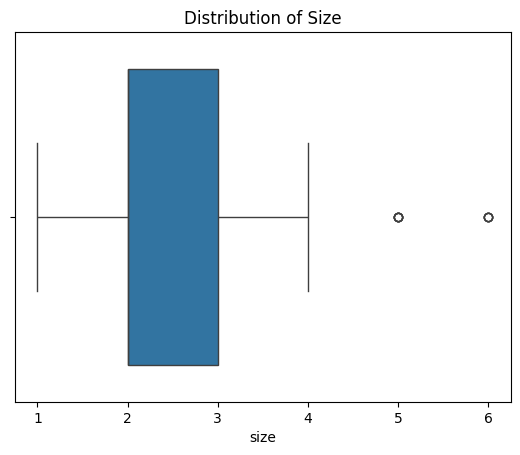

In [18]:
#plotting boxplot
sns.boxplot(data=tips, x="size")
plt.title('Distribution of Size')
plt.show()

- Majority of the customers come in groups of 2 people (~160).
- 50% of the groups have 2 to 3 people in them.

##### Understanding the distribution of day

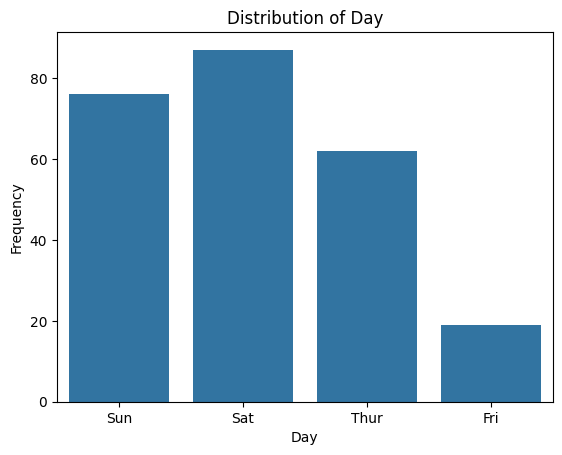

In [21]:
# plotting countplot
sns.countplot(data=tips, x='day')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Distribution of Day')
plt.show()

- The number of orders is more during the weekends than the weekdays.
- The highest number of orders is received on Saturdays

##### Understanding the distribution of time

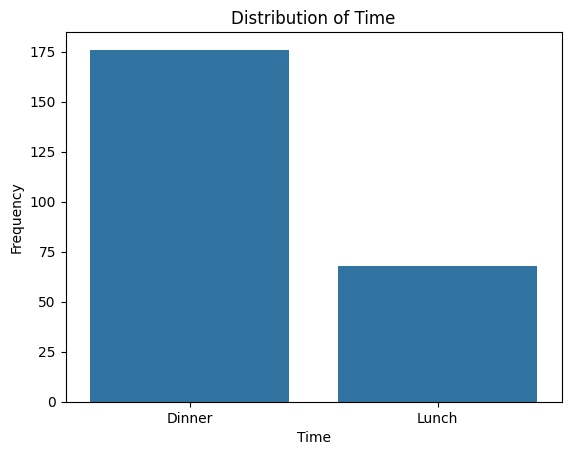

In [22]:
sns.countplot(data=tips, x='time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Distribution of Time')
plt.show()

- The restaurant receives more orders during dinner time as compared to lunch.

##### Understanding the distribution of sex

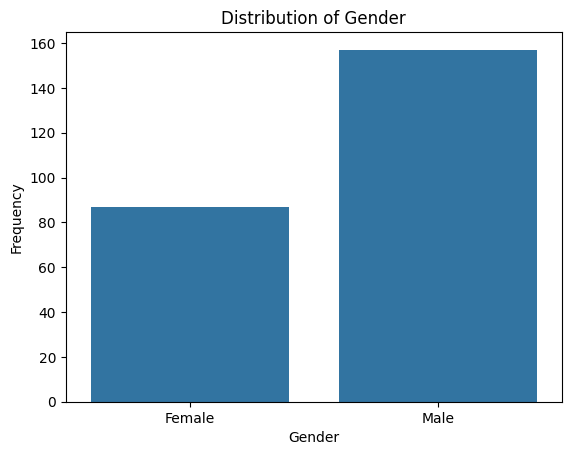

In [23]:
sns.countplot(data=tips, x='sex')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()

- The number of male bill payers is around 155 while the number of female bill payers is around 85.

##### Understanding the distribution of smoker

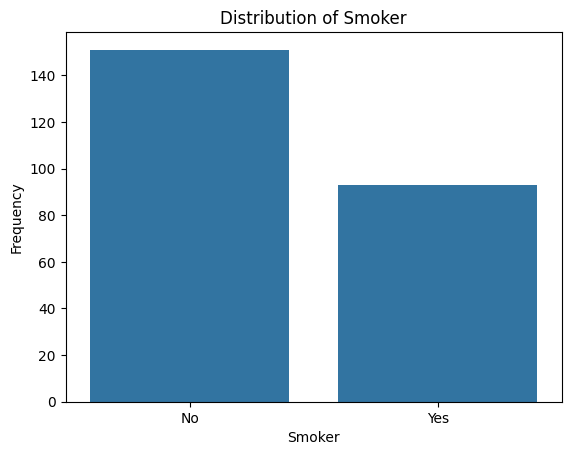

In [24]:
sns.countplot(data=tips, x='smoker')
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.title('Distribution of Smoker')
plt.show()

- The tables which include non-smokers is more than those which included smokers.

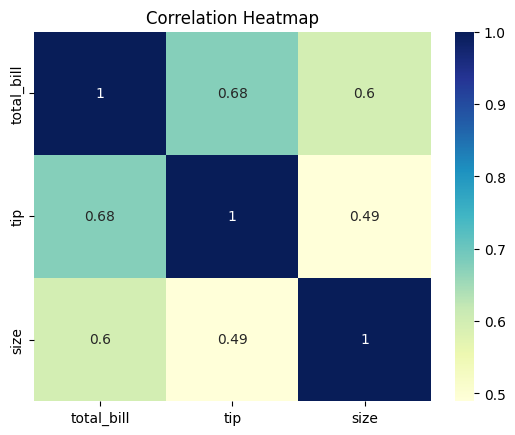

In [25]:
# plotting the heatmap
sns.heatmap(data=tips[['total_bill','tip','size']].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

- We can see that **total_bill** and **tip** columns are highly correlated with each other.
- The **total_bill** and **size** columns are also correlated with each other which makes sense since higher the group size, higher will be the bill amount and vice-versa.
- The tip and size columns are moderately related with each other.

#### **Understanding the relationship between `total_bill` and `tip` using suitable plots**

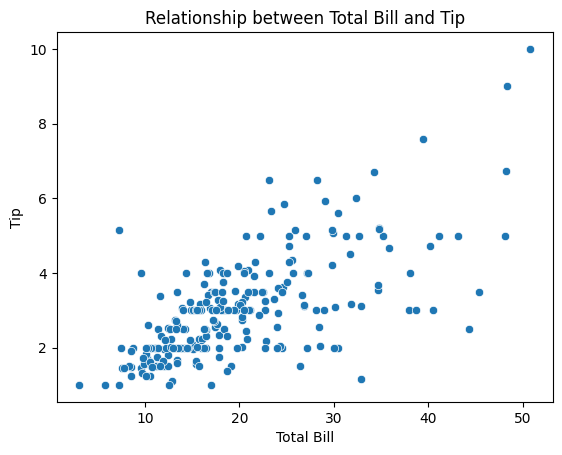

In [26]:
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Relationship between Total Bill and Tip')
plt.show()

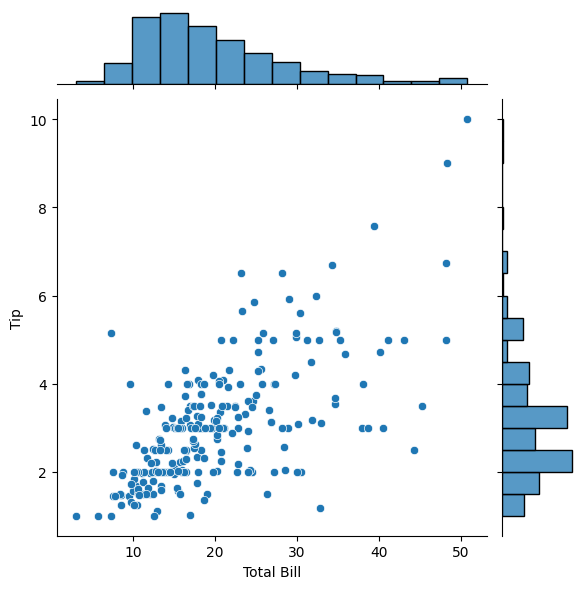

In [28]:
sns.jointplot(data=tips, x='total_bill', y='tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

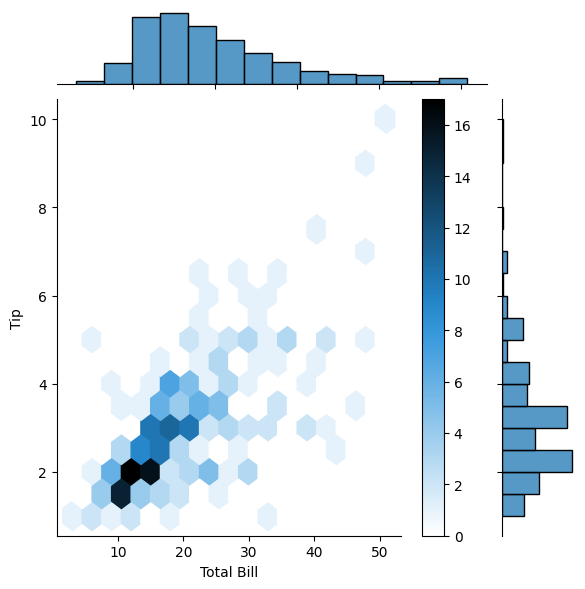

In [30]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.colorbar()
plt.show()

- There is a cluster of points in the region where the billing amount ranges from 8 to 16 dollars and the tip amount ranges from 1 to 2 dollars.

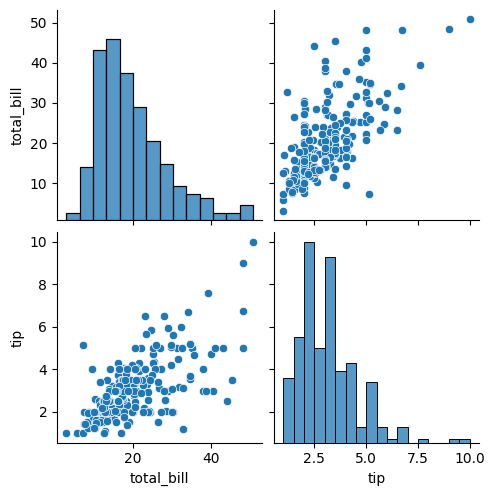

In [31]:
sns.pairplot(data = tips[['total_bill','tip']])
plt.show()

- From all the above graphs, it can be clearly seen that there is a linear relationship between **total_bill** and **tip** i.e higher the billing amount, higher is the tip amount and vice versa.

#### Relationship between total_bill and tip valid with respect to the gender of the bill payer, smoking status, days and time at which the customer has visited the restaurant and with the group size

**sex**

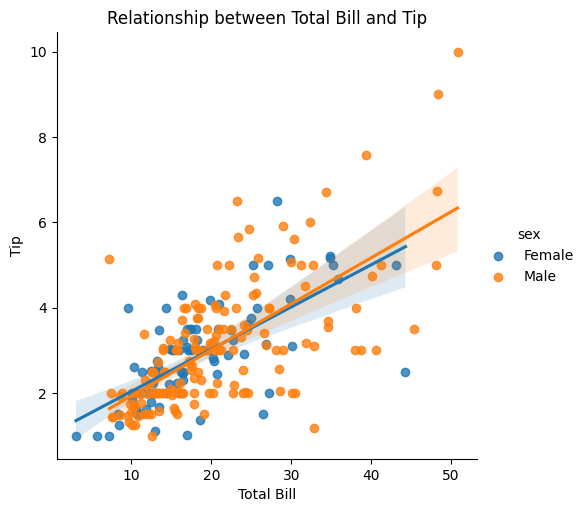

In [32]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', hue='sex')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Relationship between Total Bill and Tip')
plt.show()

- The relationship between total_bill and tip is linear with respect to both the genders.
- There are some far away points where both the billing amount and tip amount are high and the bill payer is a male.

**smoker**

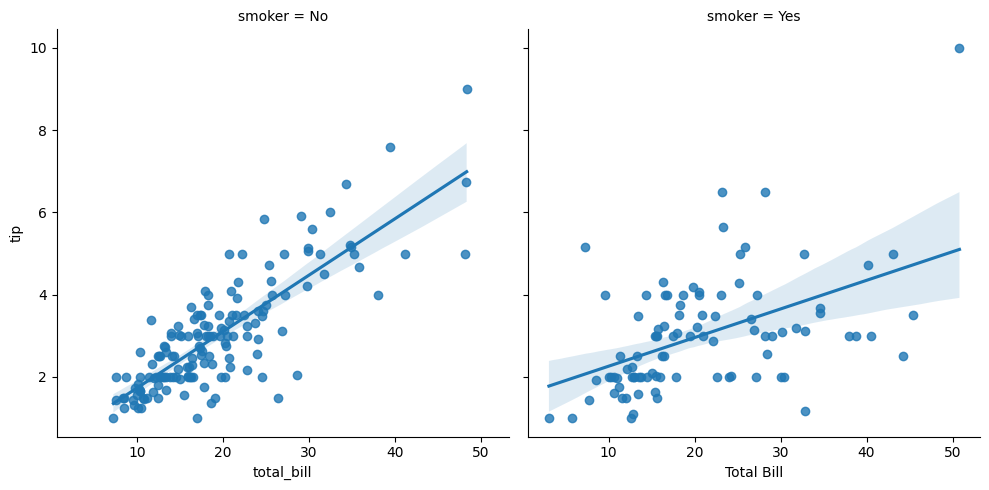

In [33]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'smoker')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

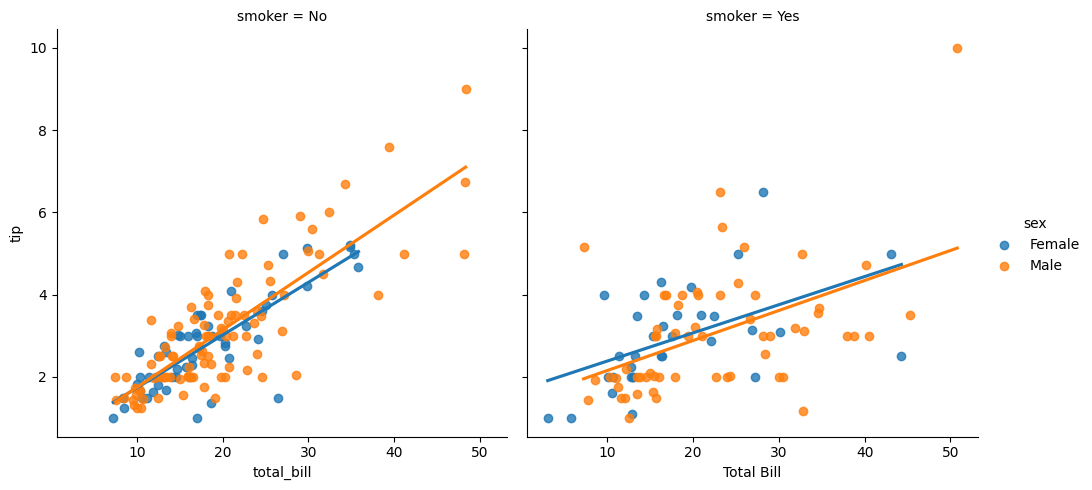

In [34]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', col='smoker', ci=False)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

- Highest tip was given from a table which included smokers
- Non smokers show a more prominent linear relationship between total_bill and tip as compared to smokers

**day**, **time**, and **size**

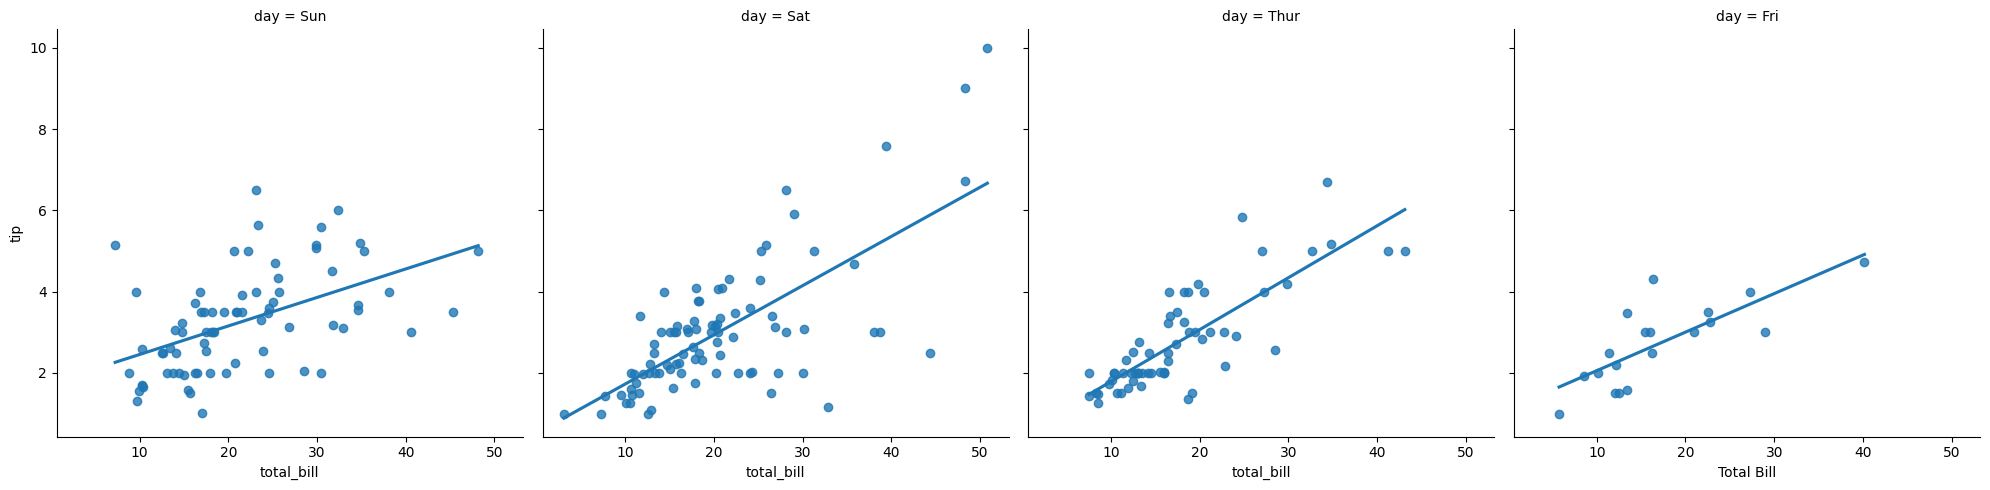

In [35]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'day', ci=False)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

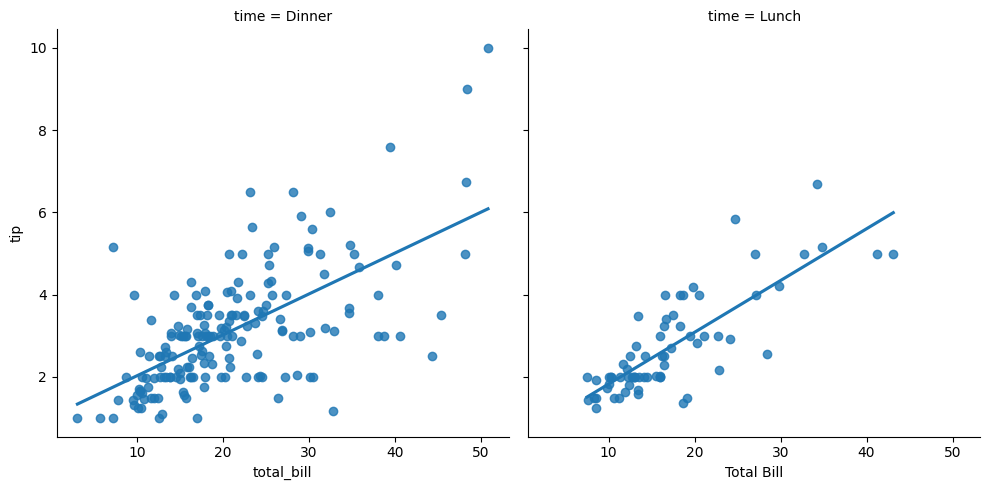

In [36]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'time', ci=False)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

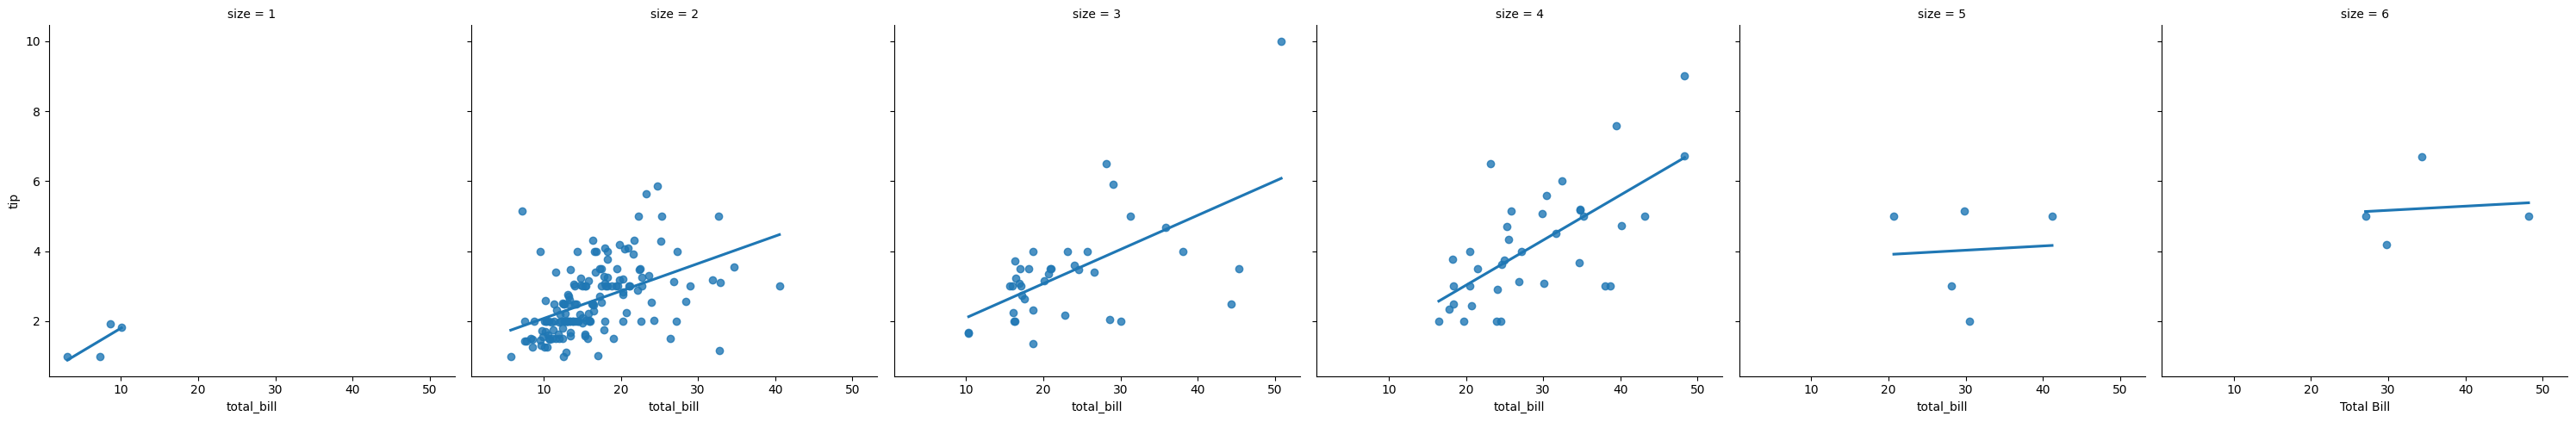

In [37]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'size', ci=False)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

- The relationship between `total_bill` and `tip` is mostly linear with respect to day and time.
- However with respect to size of the group, this relationship gets constant as the size of the group increases.

#### How does the bill amount and tip with respect to the day of visit

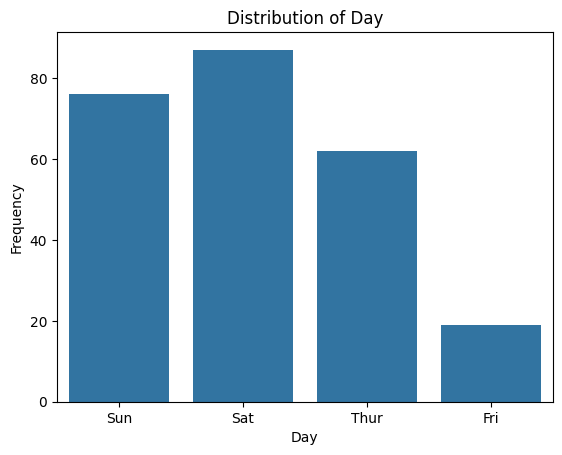

In [38]:
sns.countplot(data=tips, x='day')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Distribution of Day')
plt.show()

- We can see that the number of orders is higher during the weekends as compared to the weekdays

**`total_bill`**

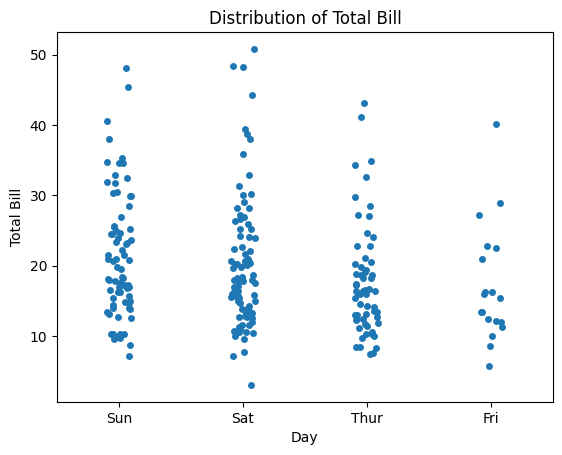

In [39]:
sns.stripplot(data=tips,x='day',y='total_bill',jitter=True)
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.title('Distribution of Total Bill')
plt.show()

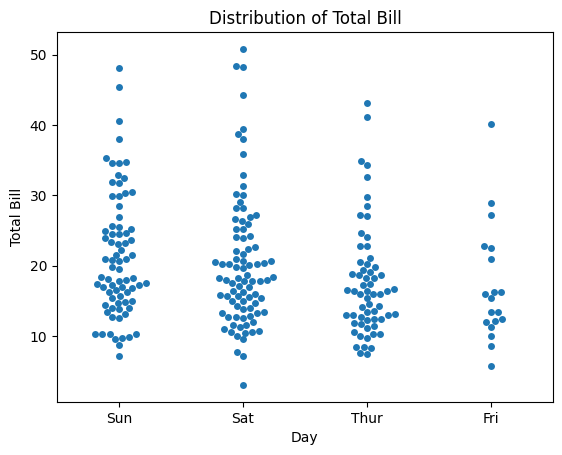

In [40]:
sns.swarmplot(data=tips, x='day',y='total_bill')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.title('Distribution of Total Bill')
plt.show()

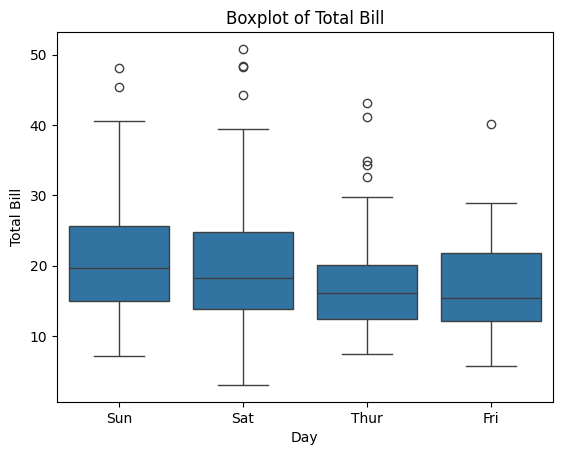

In [42]:
sns.boxplot(data=tips, x='day', y='total_bill')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.title('Boxplot of Total Bill')
plt.show()

- As we can see the number of orders is lower on Fridays as compared to the other days.
- The number of orders is higher on weekends as compared to the weekdays.
- The median billing amount on Saturdays and Sundays is higher than the other two days.

**tip**

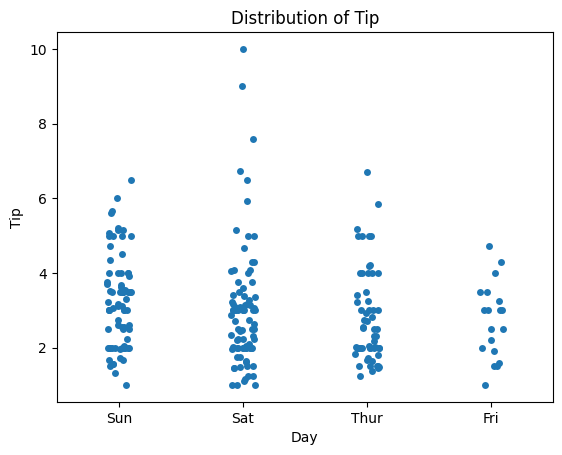

In [43]:
sns.stripplot(data=tips,x='day',y='tip',jitter=True)
plt.xlabel('Day')
plt.ylabel('Tip')
plt.title('Distribution of Tip')
plt.show()

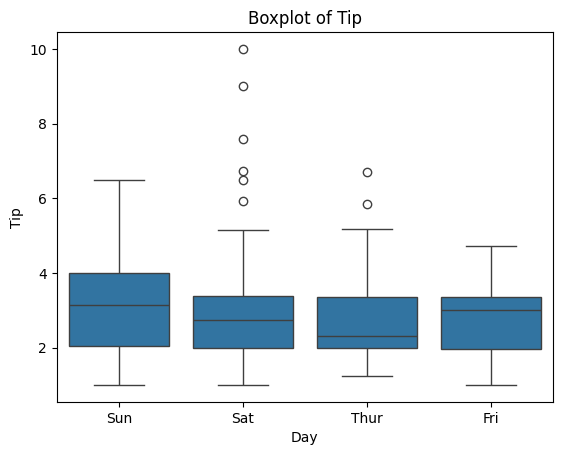

In [44]:
sns.boxplot(data=tips, x='day', y='tip')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.title('Boxplot of Tip')
plt.show()

- We can see that the median tip amount is almost equal during Friday, Saturday and Sunday and the median during these three days is higher as compared to Thursday

#### Time of the day, bill and tip amounts

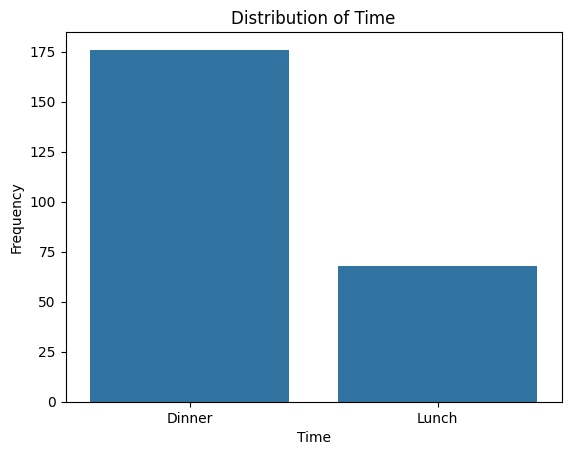

In [45]:
sns.countplot(data=tips, x='time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Distribution of Time')
plt.show()

- The number of orders during dinner is higher than the number of orders during lunch.

**total_bill**

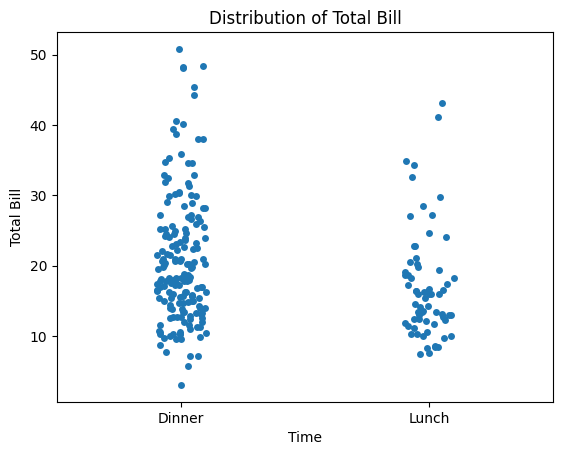

In [46]:
sns.stripplot(data=tips,x='time',y='total_bill',jitter=True)
plt.xlabel('Time')
plt.ylabel('Total Bill')
plt.title('Distribution of Total Bill')
plt.show()

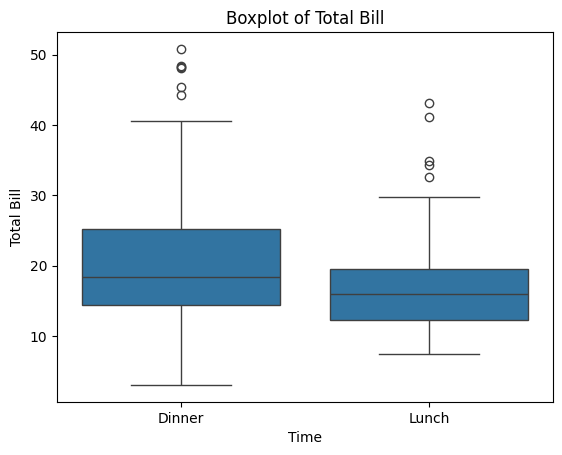

In [47]:
sns.boxplot(data=tips, x='time', y='total_bill')
plt.xlabel('Time')
plt.ylabel('Total Bill')
plt.title('Boxplot of Total Bill')
plt.show()

- The order count is higher during the dinner time
- 50% of the customers spend more than 19 dollars on the overall bill during the dinner time as compared to 16 dollars during lunch

**tip**

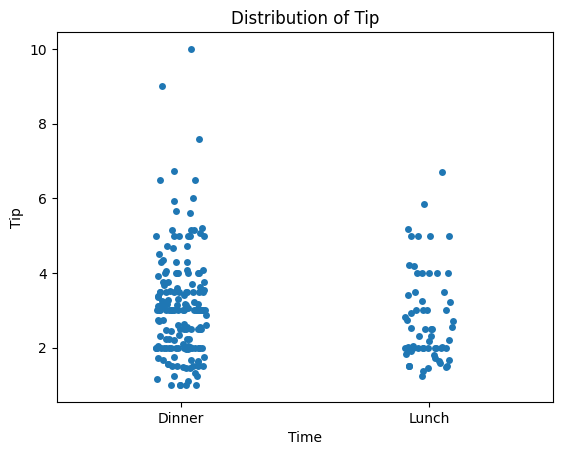

In [48]:
sns.stripplot(data=tips,x='time',y='tip',jitter=True)
plt.xlabel('Time')
plt.ylabel('Tip')
plt.title('Distribution of Tip')
plt.show()

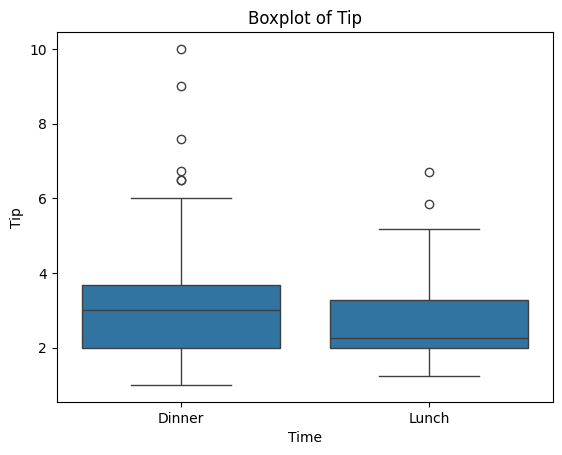

In [49]:
sns.boxplot(data=tips, x='time', y='tip')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.title('Boxplot of Tip')
plt.show()

- The median tip amount given during dinner is almost 1 dollar higher than that given during lunch time.

#### Tips and gender**


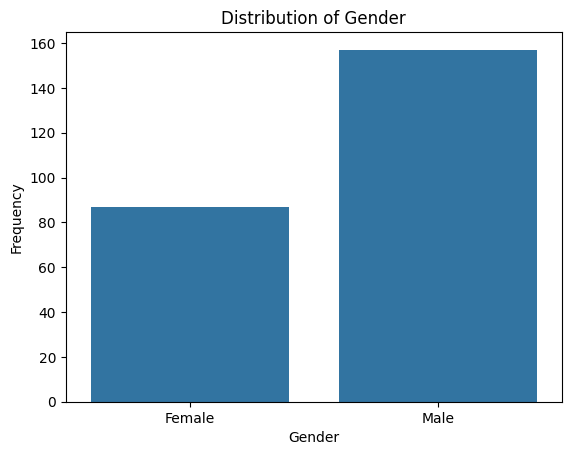

In [50]:
sns.countplot(data=tips, x='sex')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()

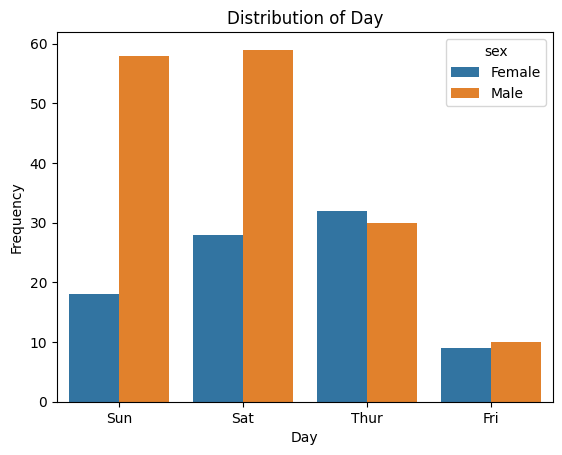

In [51]:
sns.countplot(data=tips, x='day', hue='sex')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Distribution of Day')
plt.show()

- The number of male and female bill payers is around 160 and 80 respectively i.e the number of male bill payers is almost double as compared to the number of female bill payers
- On Saturdays and Sundays, the the number of male bill payers is significantly higher than the number of female bill payers.

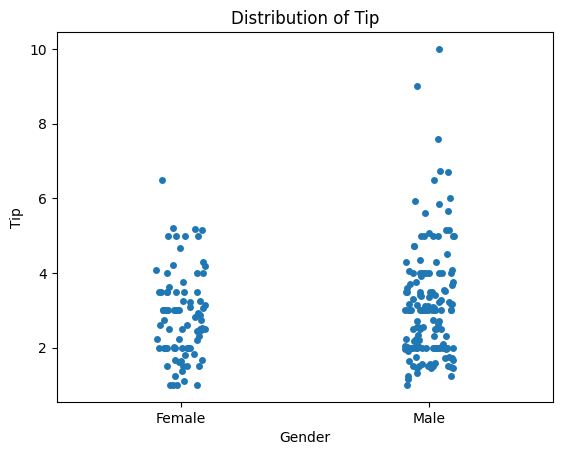

In [52]:
sns.stripplot(data=tips, x='sex', y='tip')
plt.xlabel('Gender')
plt.ylabel('Tip')
plt.title('Distribution of Tip')
plt.show()

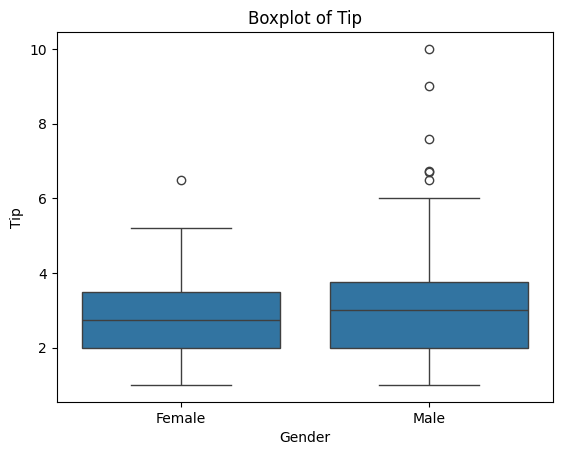

In [53]:
sns.boxplot(data=tips, x='sex', y='tip')
plt.xlabel('Gender')
plt.ylabel('Tip')
plt.title('Boxplot of Tip')
plt.show()

- The median value for `tip` is almost equal for both the genders.
- Males have a lot of outliers i.e far away values, giving higher tips.

#### Tip and Smoking Status


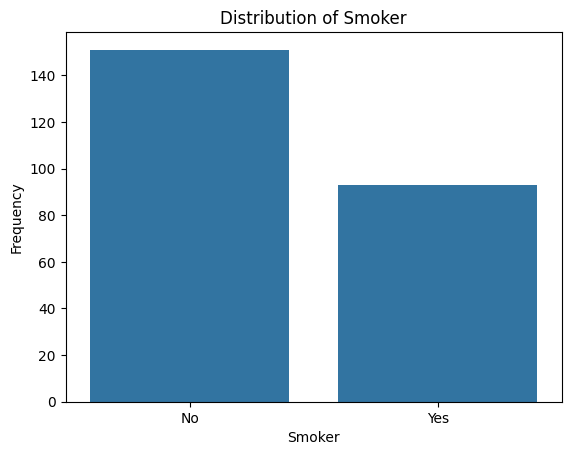

In [54]:
sns.countplot(data=tips, x='smoker')
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.title('Distribution of Smoker')
plt.show()

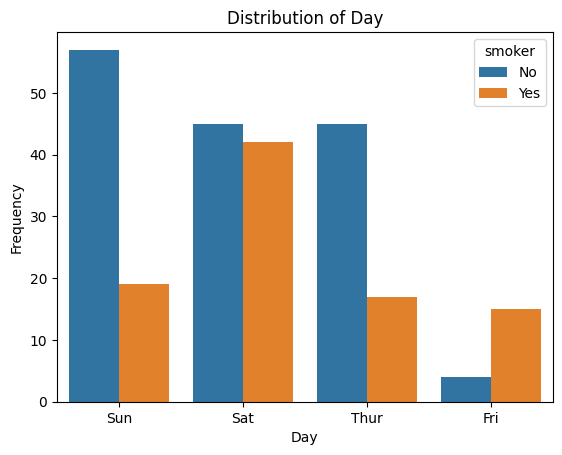

In [55]:
sns.countplot(data=tips, x='day', hue='smoker')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Distribution of Day')
plt.show()

- The tables which included non-smokers is around 60 more than those which included smokers
- The number of non-smokers is significantly higher than the number of smokers on Thursdays and Sundays
- Among all the four days, only on Fridays,the number of smokers is higher than the number of non-smokers

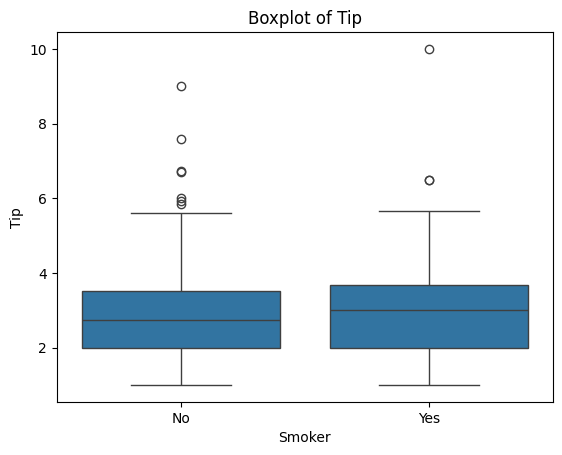

In [56]:
sns.boxplot(data=tips, x='smoker', y='tip')
plt.xlabel('Smoker')
plt.ylabel('Tip')
plt.title('Boxplot of Tip')
plt.show()

- There is no relation between smoking status and tips, the median is almost the same in both the classes



### **Insights**

- The bill amount ranges from around 3 dollars to 50 dollars while the average bill amount is around 20 dollars. Half of the bill amounts are less than 18 dollars.
- The tip amount ranges from around 1 dollar to 10 dollars. The mean and median of the tip amounts are very close to each other (~3 dollars).
- The group size varies from 1 person to 6 people.
- 50%  of the people pay less than 20 dollars for overall bill and 50% of the people pay less than 3 dollars as tip.
- There is a linear relationship between **total_bill** and **tip** i.e higher the billing amount, higher is the tip amount and vice versa.
- The relationship between **total_bill** and **tip** is linear with respect to both the genders, day and time
- Non smokers show a more prominent linear relationship between total_bill and tip as compared to smokers
- With respect to size of the group, this relationship between **total_bill** and **tip** gets constant as the size of the group increases.
- The number of orders is higher on weekends as compared to the weekdays. The order count is higher during the dinner time as compared to lunch
- The median billing amount on Saturdays and Sundays is higher than the other two days.
- The median tip amount is almost equal during Friday, Saturday and Sunday and the median during these three days is higher as compared to Thursday
- 50% of the customers spend more than 19 dollars on the overall bill during the dinner time as compared to 16 dollars during lunch
- The median tip amount given during dinner is almost 1 dollar higher than that given during lunch time.
- The number of male and female bill payers is around 160 and 80 respectively i.e the number of male bill payers is almost double as compared to the number of female bill payers
- On Saturdays and Sundays, the number of male bill payers is significantly higher than the number of female bill payers.
- The median value for **tip** is almost equal for both the genders.
- Males have a lot of outliers i.e far away values, giving higher tips.
- The tables which included non-smokers is around 60 more than those which included smokers
- The number of non-smokers is significantly higher than the number of smokers on Thursdays and Sundays
- Among all the four days, only on Fridays,the number of smokers is higher than the number of non-smokers
- There is no relation between smoking status and tips, the median is almost the same in both the classes